# Importing Modules, Reading the Dataset

In [2]:
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
!pip install bar-chart-race
import bar_chart_race as bcr
from matplotlib.animation import FuncAnimation

In [3]:
#importer le jeu de données dans un dataframe
df = pd.read_csv('RDC_Inventory_Core_Metrics_State_History_new.csv')
print('Dataset has ',df.shape[0],' records and ',df.shape[1], ' columns' )
print(' ')
df.head() # head shows the first 5 rows by default

Dataset has  3520  records and  40  columns
 


,month_date_yyyymm,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202203,wisconsin,wi,331500,0.0443,0.1515,4574,-0.0127,-0.1693,47,...,429688,0.0466,0.0692,11357,0.0570,-0.1518,1.4779,0.1587,0.0460,0.0
1,202203,west virginia,wv,184000,0.0363,0.1500,2182,-0.0259,-0.2522,64,...,312938,-0.0335,0.2420,4468,0.0166,-0.1851,1.0587,0.1015,0.1796,0.0
2,202203,alaska,ak,387450,0.0516,0.1869,733,0.0209,-0.3676,43,...,475211,0.0321,0.1532,817,0.0394,-0.3577,0.1187,0.0240,0.0221,0.0
3,202203,michigan,mi,241950,0.0638,-0.0320,10505,0.0001,-0.0702,39,...,377418,0.0220,-0.0337,19260,0.0125,-0.0974,0.8334,0.0225,-0.0570,0.0
4,202203,arizona,az,477871,0.0157,0.1948,6774,-0.0135,0.0538,33,...,778763,0.0269,0.0719,23022,-0.0138,-0.0302,2.4082,0.0086,-0.2776,1.0


In [4]:
#afficher les noms des colonnes
df.columns

Index(['month_date_yyyymm', 'state', 'state_id', 'median_listing_price',
       'median_listing_price_mm', 'median_listing_price_yy',
       'active_listing_count', 'active_listing_count_mm',
       'active_listing_count_yy', 'median_days_on_market',
       'median_days_on_market_mm', 'median_days_on_market_yy',
       'new_listing_count', 'new_listing_count_mm', 'new_listing_count_yy',
       'price_increased_count', 'price_increased_count_mm',
       'price_increased_count_yy', 'price_reduced_count',
       'price_reduced_count_mm', 'price_reduced_count_yy',
       'pending_listing_count', 'pending_listing_count_mm',
       'pending_listing_count_yy', 'median_listing_price_per_square_foot',
       'median_listing_price_per_square_foot_mm',
       'median_listing_price_per_square_foot_yy', 'median_square_feet',
       'median_square_feet_mm', 'median_square_feet_yy',
       'average_listing_price', 'average_listing_price_mm',
       'average_listing_price_yy', 'total_listing_count',
 

In [5]:
#afficher les dimension de notre dataframe
df.shape

(3520, 40)

In [6]:
df.dtypes


month_date_yyyymm                            int64
state                                       object
state_id                                    object
median_listing_price                         int64
median_listing_price_mm                    float64
median_listing_price_yy                    float64
active_listing_count                         int64
active_listing_count_mm                    float64
active_listing_count_yy                    float64
median_days_on_market                        int64
median_days_on_market_mm                   float64
median_days_on_market_yy                   float64
new_listing_count                            int64
new_listing_count_mm                       float64
new_listing_count_yy                       float64
price_increased_count                        int64
price_increased_count_mm                   float64
price_increased_count_yy                   float64
price_reduced_count                          int64
price_reduced_count_mm         

In [7]:

df['state']= df['state'].astype('category')

List of columns and the count and type of data in each column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   month_date_yyyymm                        3520 non-null   int64   
 1   state                                    3520 non-null   category
 2   state_id                                 3520 non-null   object  
 3   median_listing_price                     3520 non-null   int64   
 4   median_listing_price_mm                  2907 non-null   float64 
 5   median_listing_price_yy                  2907 non-null   float64 
 6   active_listing_count                     3520 non-null   int64   
 7   active_listing_count_mm                  2907 non-null   float64 
 8   active_listing_count_yy                  2907 non-null   float64 
 9   median_days_on_market                    3520 non-null   int64   
 10  median_days_on_market_mm            

Basic statistics of each column

In [9]:
#tableau statistique descriptive pour les colonnes quntitatives 
df.describe()

,month_date_yyyymm,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
count,3520.000000,3520.000000,2907.000000,2907.000000,3520.000000,2907.000000,2907.000000,3520.000000,2907.000000,2907.000000,...,3.520000e+03,2907.000000,2907.000000,3520.000000,2907.000000,2907.000000,3499.000000,2887.000000,2880.000000,2908.000000
mean,201893.523864,318059.444886,0.005929,0.073681,20831.169886,-0.020276,-0.169619,68.573580,0.001441,-0.099205,...,5.078431e+05,0.007093,0.082254,29903.366193,-0.009837,-0.085129,0.532763,0.019981,0.206524,0.069120
std,169.411955,126131.195776,0.022171,0.063382,24514.368481,0.076623,0.202847,24.533285,0.129925,0.156547,...,2.804071e+05,0.027126,0.091085,34640.116953,0.077723,0.154902,0.509219,0.109962,0.372700,0.253701
min,201607.000000,134450.000000,-0.098100,-0.214200,1.000000,-0.397700,-0.707900,7.000000,-0.709700,-0.706400,...,2.073370e+05,-0.339500,-0.301900,1.000000,-0.355700,-0.498100,0.000000,-0.888500,-0.804100,0.000000
25%,201712.000000,229450.000000,-0.006200,0.035600,5586.250000,-0.067300,-0.298500,51.000000,-0.066700,-0.170600,...,3.064155e+05,-0.006300,0.029750,8352.750000,-0.048250,-0.178400,0.170750,-0.017500,0.005775,0.000000
50%,201905.000000,287000.000000,0.000400,0.066900,12363.000000,-0.015200,-0.132700,65.000000,0.027300,-0.076900,...,4.059725e+05,0.003600,0.063700,18919.500000,-0.006100,-0.086200,0.354500,0.000700,0.062100,0.000000
75%,202010.000000,364990.000000,0.017400,0.105300,25405.000000,0.025700,-0.037250,82.000000,0.088550,-0.019150,...,6.080565e+05,0.018700,0.114850,36215.500000,0.033900,-0.003050,0.725550,0.042450,0.304550,0.000000
max,202203.000000,768500.000000,0.209000,0.378400,163956.000000,0.610300,0.838600,210.000000,0.423100,0.692300,...,1.757975e+06,0.506300,0.760100,218268.000000,0.786800,0.893700,2.959300,1.200900,2.501600,1.000000


Correcting the format of the Date column

In [10]:
df['month_date_yyyymm'] = pd.to_datetime(df['month_date_yyyymm'],format = '%Y%m')

df.rename(columns={'month_date_yyyymm':'Date'}, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3520 entries, 0 to 3519
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Date                                     3520 non-null   datetime64[ns]
 1   state                                    3520 non-null   category      
 2   state_id                                 3520 non-null   object        
 3   median_listing_price                     3520 non-null   int64         
 4   median_listing_price_mm                  2907 non-null   float64       
 5   median_listing_price_yy                  2907 non-null   float64       
 6   active_listing_count                     3520 non-null   int64         
 7   active_listing_count_mm                  2907 non-null   float64       
 8   active_listing_count_yy                  2907 non-null   float64       
 9   median_days_on_market                    

# Data Cleaning

Extracting the Year and Month from dates

In [12]:
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Date'] = df['Date'].dt.date
df.head()

,Date,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,Month,Year
0,2022-03-01,wisconsin,wi,331500,0.0443,0.1515,4574,-0.0127,-0.1693,47,...,0.0692,11357,0.0570,-0.1518,1.4779,0.1587,0.0460,0.0,3,2022
1,2022-03-01,west virginia,wv,184000,0.0363,0.1500,2182,-0.0259,-0.2522,64,...,0.2420,4468,0.0166,-0.1851,1.0587,0.1015,0.1796,0.0,3,2022
2,2022-03-01,alaska,ak,387450,0.0516,0.1869,733,0.0209,-0.3676,43,...,0.1532,817,0.0394,-0.3577,0.1187,0.0240,0.0221,0.0,3,2022
3,2022-03-01,michigan,mi,241950,0.0638,-0.0320,10505,0.0001,-0.0702,39,...,-0.0337,19260,0.0125,-0.0974,0.8334,0.0225,-0.0570,0.0,3,2022
4,2022-03-01,arizona,az,477871,0.0157,0.1948,6774,-0.0135,0.0538,33,...,0.0719,23022,-0.0138,-0.0302,2.4082,0.0086,-0.2776,1.0,3,2022


Sorting records by State and Date

In [13]:
df = df.sort_values(["state", "Date"], ascending = (True, True)).reset_index(drop = True) # Default is ascending
df

,Date,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,Month,Year
0,2016-07-01,alabama,al,189500,NaN,NaN,32634,NaN,NaN,89,...,NaN,34539,NaN,NaN,0.0575,NaN,NaN,NaN,7,2016
1,2016-08-01,alabama,al,189000,NaN,NaN,32061,NaN,NaN,94,...,NaN,33982,NaN,NaN,0.0600,NaN,NaN,NaN,8,2016
2,2016-09-01,alabama,al,187992,NaN,NaN,31617,NaN,NaN,96,...,NaN,33376,NaN,NaN,0.0556,NaN,NaN,NaN,9,2016
3,2016-10-01,alabama,al,185000,NaN,NaN,30942,NaN,NaN,100,...,NaN,32588,NaN,NaN,0.0528,NaN,NaN,NaN,10,2016
4,2016-11-01,alabama,al,185000,NaN,NaN,29910,NaN,NaN,107,...,NaN,31371,NaN,NaN,0.0488,NaN,NaN,NaN,11,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3515,2021-11-01,wyoming,wy,316500,-0.0262,0.1834,1454,-0.0997,-0.3063,61,...,0.3300,2288,-0.0999,-0.2528,0.5681,-0.0059,0.1077,0.0,11,2021
3516,2021-12-01,wyoming,wy,323700,0.0227,0.2124,1306,-0.1018,-0.3119,65,...,0.3230,2025,-0.1149,-0.2396,0.5498,-0.0183,0.1467,0.0,12,2021
3517,2022-01-01,wyoming,wy,344700,0.0649,0.3008,1107,-0.1524,-0.3327,77,...,0.4110,1698,-0.1615,-0.2829,0.5420,-0.0078,0.1237,1.0,1,2022
3518,2022-02-01,wyoming,wy,341000,-0.0107,0.2772,999,-0.0976,-0.3458,71,...,0.3484,1692,-0.0035,-0.2849,0.6967,0.1547,0.1499,0.0,2,2022


# Grouping the Records based on Price Change

Classifying the records (State-Months) in one of three categories: 1- Decreased listing price from last year 2- Decreased listing price from last month 3- Increased listing price.

In [14]:
filters = [
   (df['average_listing_price_yy'] < 0) & (df['median_listing_price_yy'] < 0),
   (df['average_listing_price_mm'] < 0) & (df['median_listing_price_mm'] < 0),
]
values = ["Down from last year", "Down from last month"]

df["category"] = np.select(filters, values, default="Increase in prices" )
#df["category"]

Majority of all the records (73.7%) show an increase in the listing price compared to the last year and month

In [15]:
print('Price ratios for all the records:')
df['category'].value_counts()/len(df['category'])*100

Price ratios for all the records:


Increase in prices      73.238636
Down from last month    22.926136
Down from last year      3.835227
Name: category, dtype: float64

The housing market is inflated

In [16]:
##!!!!
print('2020 Price ratios:')
print(df.loc[df['Year']== 2020,'category'].value_counts()/len(df[df['Year']== 2020])*100)
print(' ')
print('2021 Price ratios:')
print(df.loc[df['Year']== 2021,'category'].value_counts()/len(df[df['Year']== 2021])*100)
print(' ')
print('2022 Price ratios:')
print(df.loc[df['Year']== 2022,'category'].value_counts()/len(df[df['Year']== 2022])*100)
print(' ')

2020 Price ratios:
Increase in prices      75.163399
Down from last month    20.588235
Down from last year      4.248366
Name: category, dtype: float64
 
2021 Price ratios:
Increase in prices      73.529412
Down from last month    20.751634
Down from last year      5.718954
Name: category, dtype: float64
 
2022 Price ratios:
Increase in prices      84.967320
Down from last year     10.457516
Down from last month     4.575163
Name: category, dtype: float64
 


# Market Trend Visualizations

Mean monthly price across the US since 2016

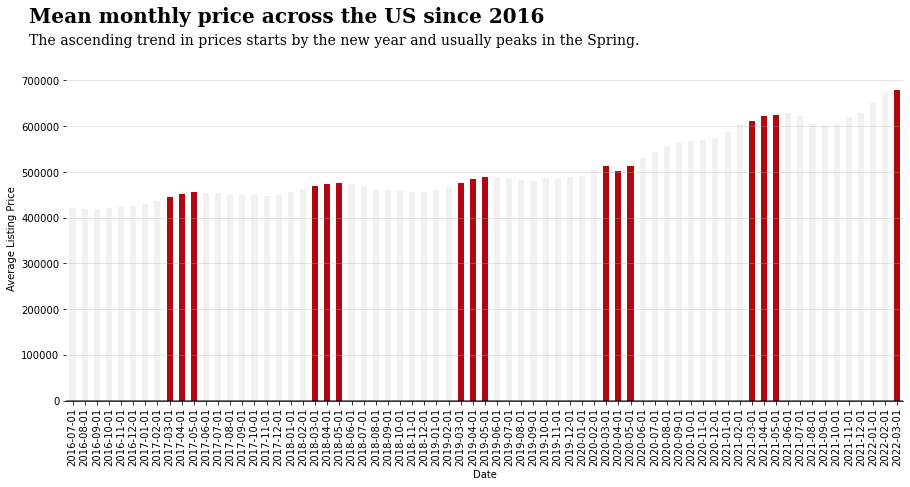

In [17]:
data = df.groupby(['Date'])['average_listing_price'].mean()

fig, ax = plt.subplots(1,1, figsize=(15, 6)) 
#ax.text(0.01, 1, 'Mean monthly price across the US since 2016', fontsize=15, fontweight='bold', fontfamily='serif')

color_map = ['#f1f1f1' for _ in range(12)]
color_map[8] = color_map[9] = color_map[10] =  '#b20710' # color highlight

ax = df.groupby(['Date'])['average_listing_price'].mean().plot(kind = 'bar',color=color_map)
ax.set_ylabel("Average Listing Price")
fig.text(0.09, 1, 'Mean monthly price across the US since 2016', fontsize=20, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The ascending trend in prices starts by the new year and usually peaks in the Spring.', fontsize=14, fontweight='light', fontfamily='serif')

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
# thickening the bottom line
plt.axhline(y = 0, color = 'black', linewidth = 1.5, alpha = .7)

plt.show()
plt.close()

In [18]:
down = df.loc[df['category'].isin(["Down from last year"])]

print("The states experiencing at least one month of decrease in price in 2020 compared to 2019 are:")
print(down.loc[down['Year'] == 2020]['state'].unique())
print('  ')
print("The states which experienced at least one month of decrease in price in 2021 compared to 2020 are:")
print(down.loc[down['Year'] == 2021]['state'].unique())
print('  ')
print("The states which experienced at least one month of decrease in price in 2022 compared to 2021 are:")
print(down.loc[down['Year'] == 2022]['state'].unique())

The states experiencing at least one month of decrease in price in 2020 compared to 2019 are:
['district of columbia', 'hawaii', 'illinois', 'iowa', 'nebraska', 'north dakota', 'texas', 'west virginia', 'wyoming']
Categories (52, object): ['alabama', 'alaska', 'arizona', 'arkansas', ..., 'washington', 'west virginia', 'wisconsin', 'wyoming']
  
The states which experienced at least one month of decrease in price in 2021 compared to 2020 are:
['california', 'district of columbia', 'kansas', 'massachusetts', 'michigan', 'new jersey', 'ohio', 'pennsylvania', 'rhode island', 'wisconsin']
Categories (52, object): ['alabama', 'alaska', 'arizona', 'arkansas', ..., 'washington', 'west virginia', 'wisconsin', 'wyoming']
  
The states which experienced at least one month of decrease in price in 2022 compared to 2021 are:
['california', 'district of columbia', 'illinois', 'michigan', 'ohio', 'pennsylvania', 'rhode island']
Categories (52, object): ['alabama', 'alaska', 'arizona', 'arkansas', ...,

States housing price range comparison

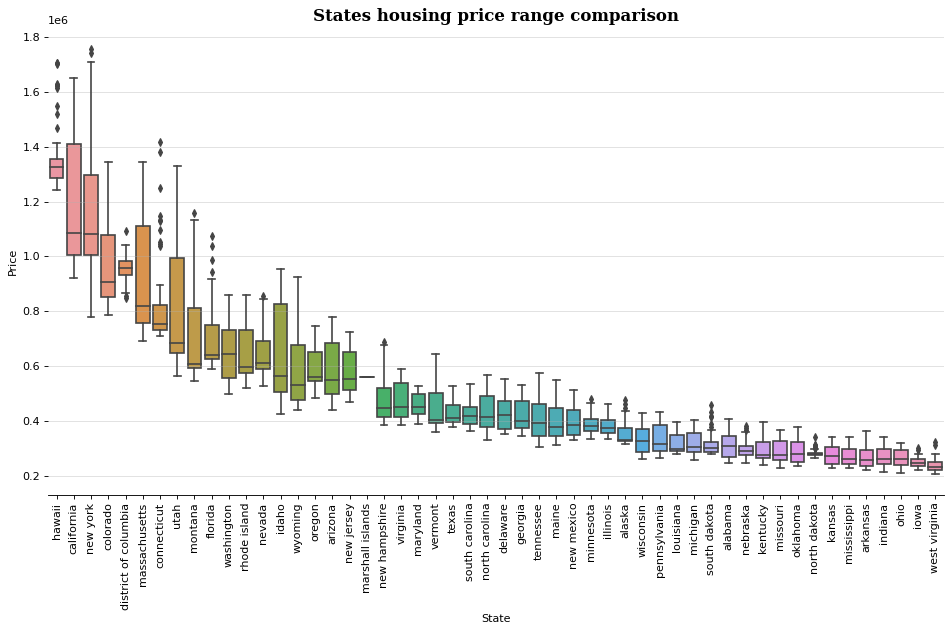

In [19]:
# Visualization
fig, ax = plt.subplots(1,1, figsize=(12, 8), dpi=80)

# Find the order
my_order = df.groupby(by=["state"])["average_listing_price"].mean().sort_values(ascending=False).index

box_plot = sns.boxplot(x = 'state',y = 'average_listing_price',data = df, order=my_order)
plt.ylabel('Price')
plt.xlabel('State')
plt.title('States housing price range comparison', fontsize=15, fontweight='bold', fontfamily='serif')

ax = box_plot.axes

lines = ax.get_lines()
#categories = ax.get_xticks()
ax.tick_params(axis='x', rotation=90)

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4) 

box_plot.figure.tight_layout()
plt.savefig("l’intervalle de prix de vente pour chaque région",dpi=400)


#fig = box_plot.get_figure()

Plotting states housing data on the US map

In [20]:


# Reading the geodataframe
usa = gpd.read_file("states_21basic/states.shp")
usa['STATE_NAME'] = usa['STATE_NAME'].str.lower()

# joining the geodataframe with the aggregated housing data
df_agg = df.groupby('state').agg('mean').reset_index().rename(columns={"index": "state"})
merged = usa.set_index('STATE_NAME').join(df_agg.set_index('state'))
merged = merged.reset_index()
merged_filtered = merged[~merged['STATE_NAME'].isin(['alaska','hawaii'])]

States housing price comparison on the map- averaged over 2016 to 2022

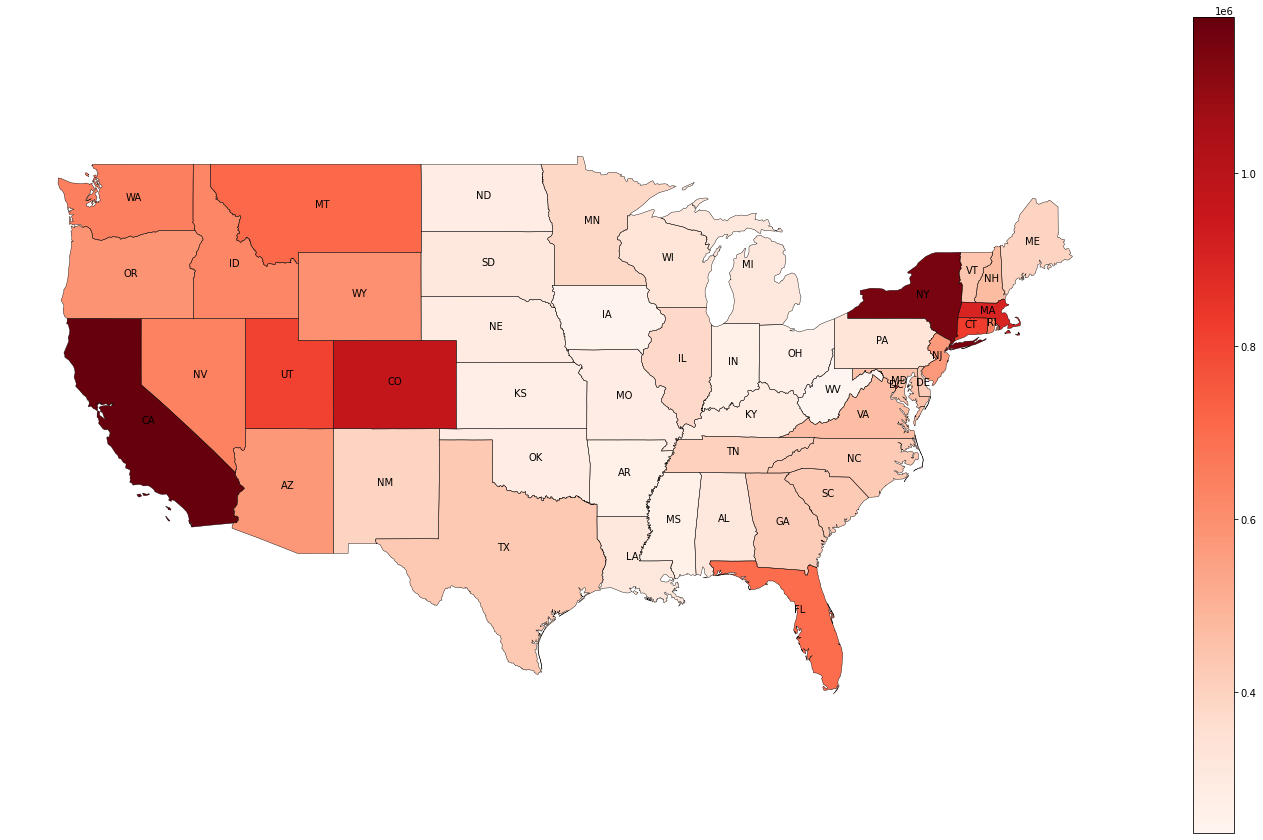

In [21]:
# Geopandas extends pandas data objects to include geographic information to plot the data over the map. 
gdf = gpd.GeoDataFrame(merged_filtered)
variable = 'average_listing_price'
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
gdf.apply(lambda x: ax.annotate(text=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);
gdf.boundary.plot(ax=ax, color='Black', linewidth=.4)

gdf.plot(ax =ax ,column=variable, cmap='Reds', figsize=(30,20),legend =True)

plt.axis('off')
plt.show()
plt.close()

States housing total listing comparison on the map- averaged over 2016 to 2021

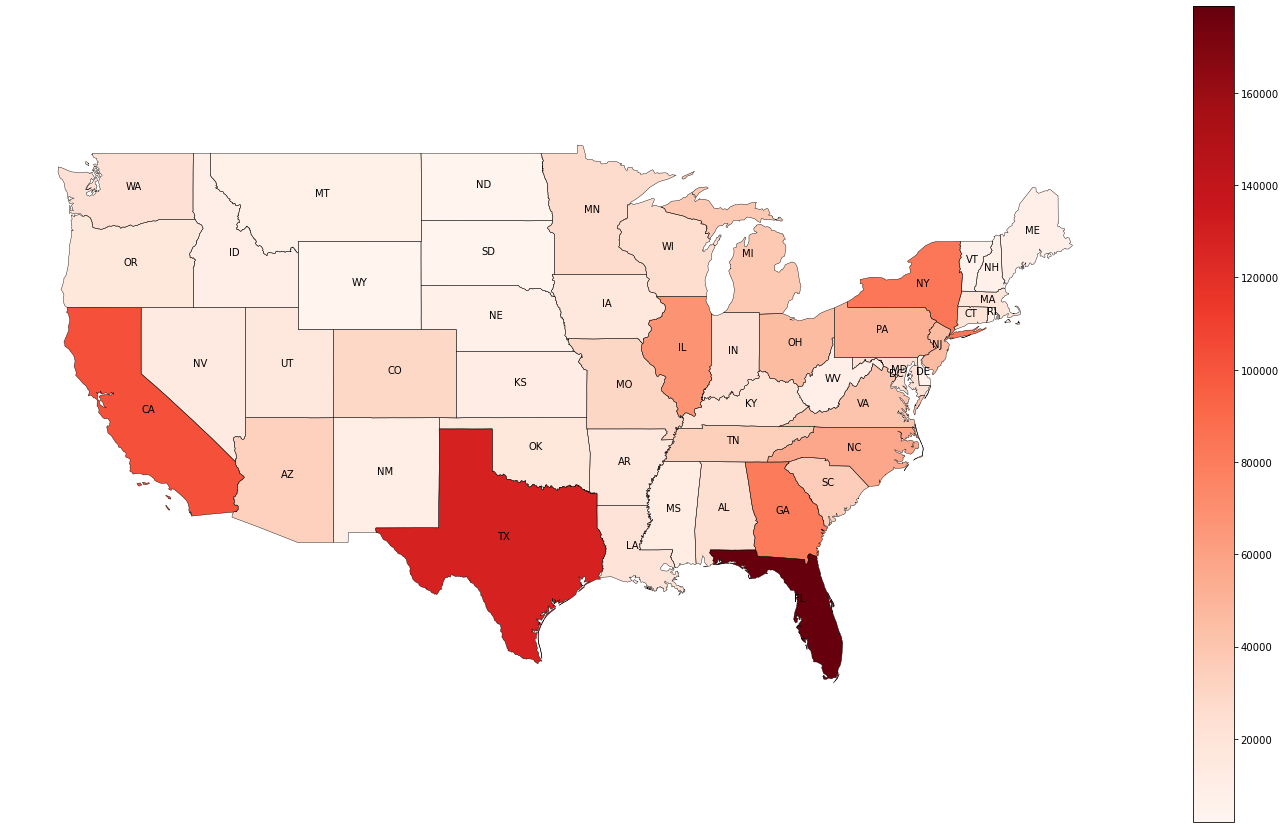

In [22]:
variable = 'total_listing_count'
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot() 
gdf.apply(lambda x: ax.annotate(text=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);
gdf.boundary.plot(ax=ax, color='Black', linewidth=.4)

gdf.plot(ax =ax ,column=variable, cmap='Reds', figsize=(30,20),legend =True)

#plt.legend(loc=2, bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.axis('off')
plt.show()
plt.close()

In [23]:
# joining the geodataframe with the aggregated housing data of year 2021
df_agg_2021 = df[df['Year'] == 2021].groupby('state').agg('mean').reset_index().rename(columns={"index": "state"})
merged = usa.set_index('STATE_NAME').join(df_agg_2021.set_index('state'))
merged = merged.reset_index()
merged_filtered = merged[~merged['STATE_NAME'].isin(['alaska','hawaii'])]

Average percentage of 2021 price change from last year

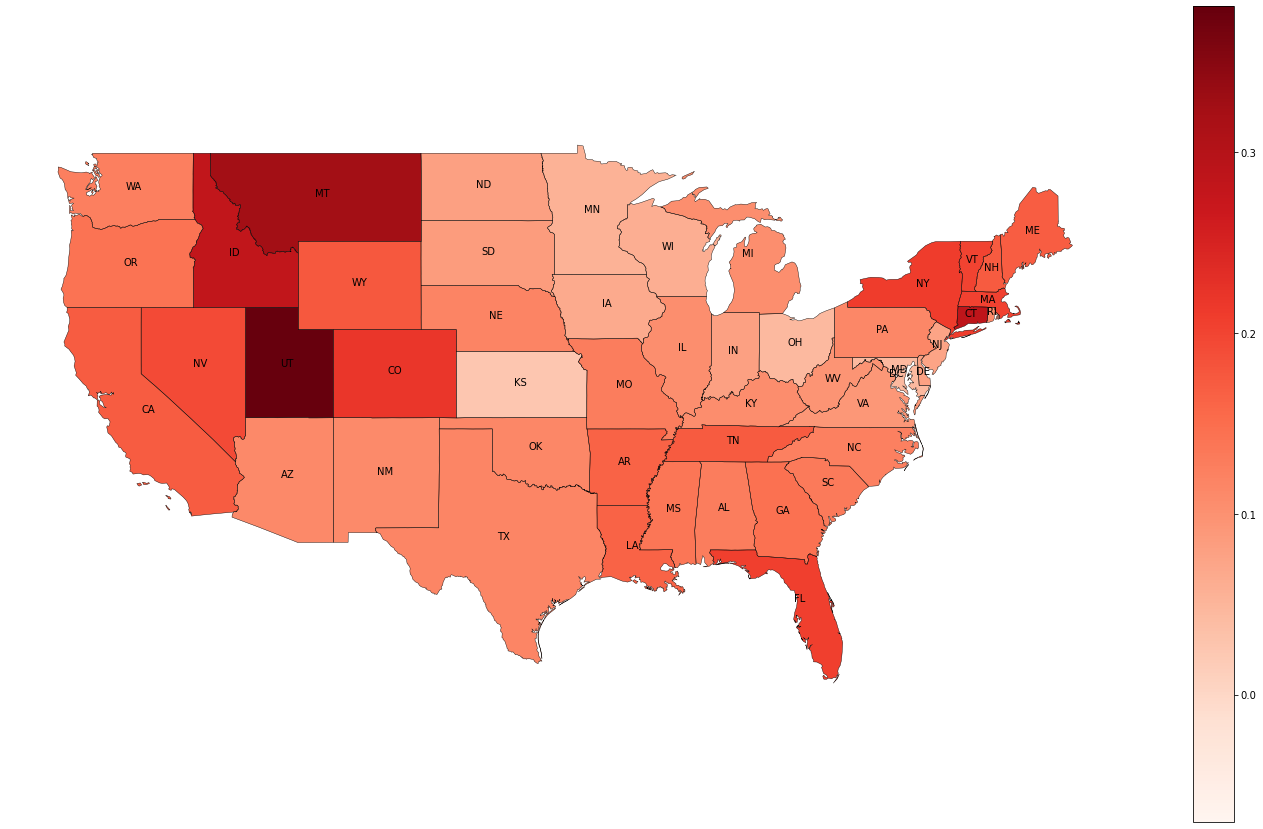

In [24]:
gdf = gpd.GeoDataFrame(merged_filtered)
variable = 'average_listing_price_yy'
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
gdf.apply(lambda x: ax.annotate(text=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=10),axis=1);
gdf.boundary.plot(ax=ax, color='Black', linewidth=.4)

gdf.plot(ax =ax ,column=variable, cmap='Reds', figsize=(30,20),legend =True)

plt.axis('off')
plt.show()
plt.close()

In [25]:
df_2021 = df[df['Year'] == 2021]
df_2021.loc[df['average_listing_price_yy'] == df_2021['average_listing_price_yy'].max()]
df_2022 = df[df['Year'] == 2022]
df_2022.loc[df['average_listing_price_yy'] == df_2022['average_listing_price_yy'].max()]

,Date,state,state_id,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,Month,Year,category
481,2022-02-01,connecticut,ct,507400,0.0593,0.3044,3600,-0.1031,-0.6042,60,...,9848,-0.036,0.0681,1.7356,0.186,1.7218,1.0,2,2022,Increase in prices


Price per square foot distribution in Utah through the years

The price has doubled since 2016!

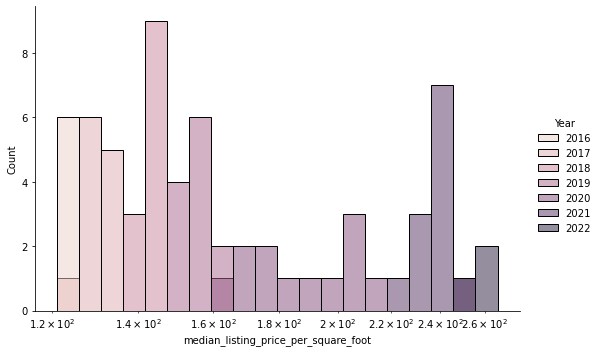

In [26]:
sns.displot( 
    data = df[df['state']=='utah'],
    x = "median_listing_price_per_square_foot",
    hue = "Year",
    kind = "hist",
    aspect = 1.5,
    log_scale = 10,
    bins = 20
             )
print(' ')

The Housing Price Bar Chart Race

In [27]:
df_race = df[['Date','state','average_listing_price']]
df_race['state'] = df_race['state'].str.title()
df_race=df_race.pivot_table(values = 'average_listing_price',index=['Date'],columns = 'state')

<ipython-input-27-5420e9dbf2fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_race['state'] = df_race['state'].str.title()


In [28]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [31]:
bcr.bar_chart_race(df =df_race,n_bars = 8, sort = 'desc', steps_per_period =10,  title= 'Average Housing Price Bar Race',filter_column_colors=True,dpi=180,cmap='dark12',fixed_max=True,figsize=(4, 3))


C:\Users\alaii\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\alaii\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


Price trend comparison of select states

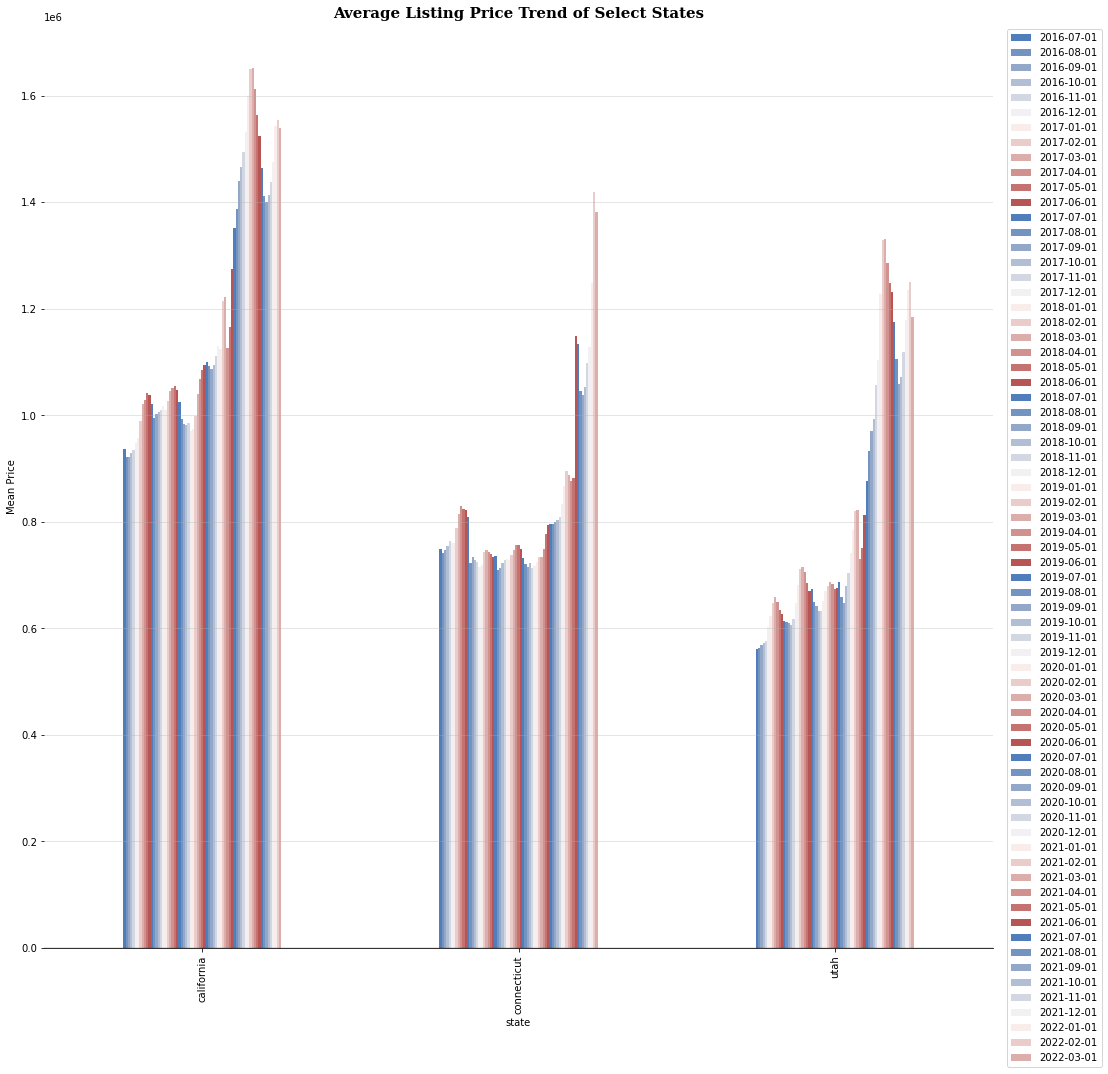

In [47]:
ax = df.loc[df['state'].isin(["utah","california","connecticut"])].pivot_table(index='state', values='average_listing_price', aggfunc='mean',columns='Date')\
.plot(kind="bar",figsize=(17, 17),color = sns.color_palette("vlag", 12))

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.grid(axis='y', linestyle='-', alpha=0.4)       
plt.ylabel('Mean Price')
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
plt.title('Average Listing Price Trend of Select States', fontsize=15, fontweight='bold', fontfamily='serif')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.savefig('test.png', bbox_inches='tight')
plt.show()
plt.close()


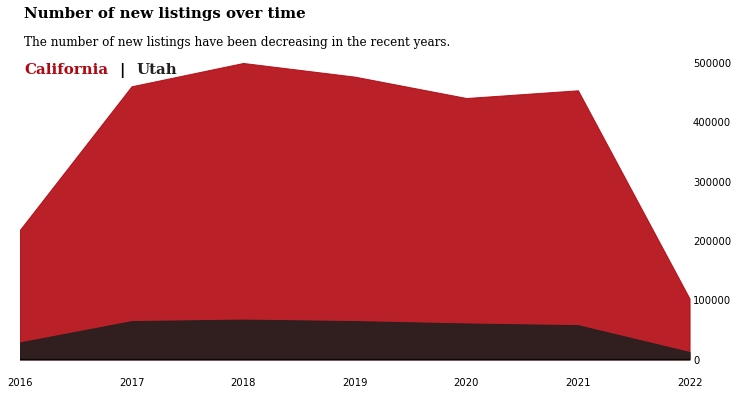

In [48]:
states_list= ["california","utah"]
data_filtered =df.loc[df['state'].isin(states_list)]
data_sub = pd.DataFrame(df.groupby(['state','Year'])['new_listing_count'].sum().unstack()).loc[['california',"utah"]].T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(states_list):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)
    
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)
ax.grid(False)

ax.set_xlim(2016,2022)
plt.xticks(np.arange(2016, 2023, 1))


fig.text(0.13, 0.95, 'Number of new listings over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.85, 
'''The number of new listings have been decreasing in the recent years.
''', fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.82,"California", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.24,0.82,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.26,0.82,"Utah", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


Price and Number of Listings on the Market Correlation

In [49]:
import scipy.stats as scs 

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = list(df.select_dtypes(include=numerics).columns)

def test_normality(col,data):
  stat, p = scs.shapiro(data)
  if p < 0.05:
    print(f'p-Value: {p}. {col} is not normaly distributed.')
  else:
    print(f'p-Value: {p}. {col} is normaly distributed.')
    
for col in numerical_columns:
    test_normality(col,df[col])  

p-Value: 1.8216880036222622e-44. median_listing_price is not normaly distributed.
p-Value: 1.0. median_listing_price_mm is normaly distributed.
p-Value: 1.0. median_listing_price_yy is normaly distributed.
p-Value: 0.0. active_listing_count is not normaly distributed.
p-Value: 1.0. active_listing_count_mm is normaly distributed.
p-Value: 1.0. active_listing_count_yy is normaly distributed.
p-Value: 8.402759635689072e-35. median_days_on_market is not normaly distributed.
p-Value: 1.0. median_days_on_market_mm is normaly distributed.
p-Value: 1.0. median_days_on_market_yy is normaly distributed.
p-Value: 0.0. new_listing_count is not normaly distributed.
p-Value: 1.0. new_listing_count_mm is normaly distributed.
p-Value: 1.0. new_listing_count_yy is normaly distributed.
p-Value: 0.0. price_increased_count is not normaly distributed.
p-Value: 1.0. price_increased_count_mm is normaly distributed.
p-Value: 1.0. price_increased_count_yy is normaly distributed.
p-Value: 0.0. price_reduced_cou

<ipython-input-50-d2dc88ed8a0c>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


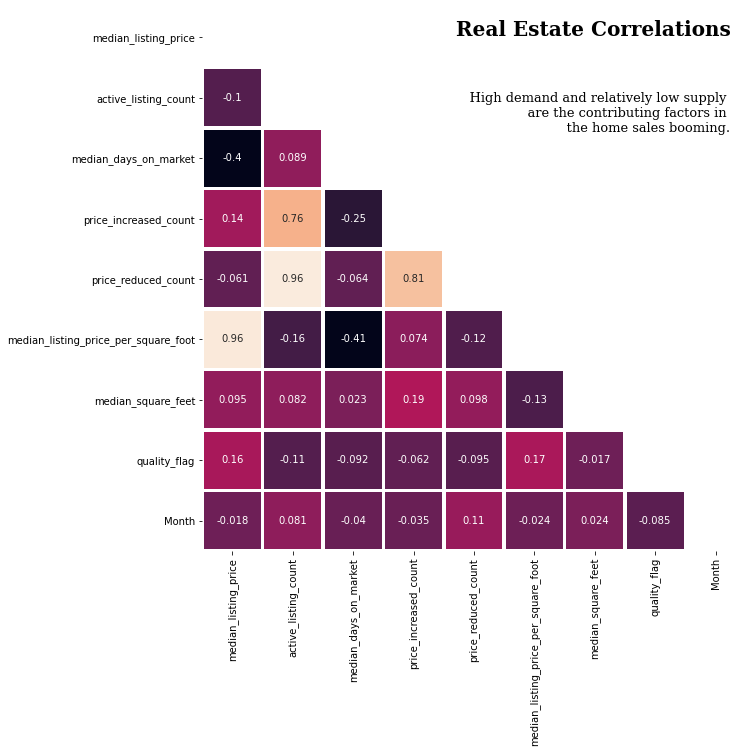

In [50]:
filtered_columns = [col for col in numerical_columns  if all(xs not in col for xs in ['average','mm','yy','pending','total','new','Year'])]

corr = df[filtered_columns].corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15,10))
fig.text(.75,.84,'Real Estate Correlations', fontfamily='serif',fontweight='bold',fontsize=20,ha='right')
fig.text(.75,.665,
            '''
             High demand and relatively low supply 
             are the contributing factors in 
             the home sales booming.
             
             ''', fontfamily='serif',fontsize=13,ha='right')
pl = sns.heatmap(corr, mask=mask, annot = True, square=True, linewidths=2.5, cbar=False)
plt.savefig('Correlation.png', bbox_inches='tight')